In [9]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [10]:
df = pd.read_csv('./data/winequality-red.csv', sep=';', header = 0)
std = StandardScaler().fit_transform(df.iloc[:, 0:-1])
pcaModel = PCA()
pca = pcaModel.fit_transform(std)
pca.shape


(1599, 11)

In [11]:
df.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

In [3]:
np.cumsum(pcaModel.explained_variance_ratio_ * 100)


array([ 28.17393128,  45.68220118,  59.77805108,  70.80743772,
        79.52827474,  85.52471351,  90.83190641,  94.67696732,
        97.81007747,  99.4585608 , 100.        ])

In [150]:
pcaModel.explained_variance_ratio_ *100

array([28.17393128, 17.50826991, 14.0958499 , 11.02938664,  8.72083701,
        5.99643877,  5.3071929 ,  3.84506091,  3.13311015,  1.64848333,
        0.5414392 ])

In [151]:
pcaModel.explained_variance_

array([3.10107182, 1.92711489, 1.55151379, 1.21399175, 0.95989238,
       0.66002104, 0.58415655, 0.42322138, 0.34485779, 0.18144664,
       0.05959558])

In [12]:
eigen_df = pd.DataFrame({'Eigenval': pcaModel.explained_variance_, 'Feature':df.columns.values[:-1]})

In [13]:
eigen_df.to_json(orient="records")


'[{"Eigenval":3.1010718227,"Feature":"fixed acidity"},{"Eigenval":1.9271148897,"Feature":"volatile acidity"},{"Eigenval":1.5515137913,"Feature":"citric acid"},{"Eigenval":1.2139917499,"Feature":"residual sugar"},{"Eigenval":0.9598923793,"Feature":"chlorides"},{"Eigenval":0.660021036,"Feature":"free sulfur dioxide"},{"Eigenval":0.5841565454,"Feature":"total sulfur dioxide"},{"Eigenval":0.4232213784,"Feature":"density"},{"Eigenval":0.3448577877,"Feature":"pH"},{"Eigenval":0.1814466416,"Feature":"sulphates"},{"Eigenval":0.0595955825,"Feature":"alcohol"}]'

In [14]:
pca_wine = pd.DataFrame(data = pca, columns=[f'PC{i}' for i in range(1, len(df.columns))])

In [15]:
pca_wine

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921,-0.161043,-0.282258,0.005098,-0.267759,0.048630
1,-0.799170,1.856553,-0.911690,0.548066,-0.018392,0.929714,-1.009829,0.762587,-0.520707,0.062833,-0.138142
2,-0.748479,0.882039,-1.171394,0.411021,-0.043531,0.401473,-0.539553,0.597946,-0.086857,-0.187442,-0.118229
3,2.357673,-0.269976,0.243489,-0.928450,-1.499149,-0.131017,0.344290,-0.455375,0.091577,-0.130393,0.316714
4,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921,-0.161043,-0.282258,0.005098,-0.267759,0.048630
...,...,...,...,...,...,...,...,...,...,...,...
1594,-2.150500,0.814286,0.617063,0.407687,-0.240936,0.054835,0.170812,-0.355866,-0.971524,0.356851,-0.053382
1595,-2.214496,0.893101,1.807402,0.414003,0.119592,-0.674711,-0.607970,-0.247640,-1.058135,0.478879,-0.241258
1596,-1.456129,0.311746,1.124239,0.491877,0.193716,-0.506410,-0.231082,0.079382,-0.808773,0.242248,-0.402910
1597,-2.270518,0.979791,0.627965,0.639770,0.067735,-0.860408,-0.321487,-0.468876,-0.612248,0.779404,0.040923


In [16]:
coeff = np.transpose(pcaModel.components_[0:2, :])
coeff

array([[ 0.48931422, -0.11050274],
       [-0.23858436,  0.27493048],
       [ 0.46363166, -0.15179136],
       [ 0.14610715,  0.27208024],
       [ 0.21224658,  0.14805156],
       [-0.03615752,  0.51356681],
       [ 0.02357485,  0.56948696],
       [ 0.39535301,  0.23357549],
       [-0.43851962,  0.00671079],
       [ 0.24292133, -0.03755392],
       [-0.11323206, -0.38618096]])

In [17]:
pca2D = pca_wine[['PC1', 'PC2']]
pca2D

,PC1,PC2
0,-1.619530,0.450950
1,-0.799170,1.856553
2,-0.748479,0.882039
3,2.357673,-0.269976
4,-1.619530,0.450950
...,...,...
1594,-2.150500,0.814286
1595,-2.214496,0.893101
1596,-1.456129,0.311746
1597,-2.270518,0.979791


In [18]:
loadings = pd.DataFrame(data=coeff, columns=['x','y'])
loadings

,x,y
0,0.489314,-0.110503
1,-0.238584,0.274930
2,0.463632,-0.151791
3,0.146107,0.272080
4,0.212247,0.148052
5,-0.036158,0.513567
6,0.023575,0.569487
7,0.395353,0.233575
8,-0.438520,0.006711
9,0.242921,-0.037554


In [19]:
loadings['label'] = df.columns.values[:-1]
loadings

,x,y,label
0,0.489314,-0.110503,fixed acidity
1,-0.238584,0.274930,volatile acidity
2,0.463632,-0.151791,citric acid
3,0.146107,0.272080,residual sugar
4,0.212247,0.148052,chlorides
5,-0.036158,0.513567,free sulfur dioxide
6,0.023575,0.569487,total sulfur dioxide
7,0.395353,0.233575,density
8,-0.438520,0.006711,pH
9,0.242921,-0.037554,sulphates


In [20]:
np.sum(np.square(pcaModel.components_.T *
       np.sqrt(pcaModel.explained_variance_)), axis=0)


array([3.10107182, 1.92711489, 1.55151379, 1.21399175, 0.95989238,
       0.66002104, 0.58415655, 0.42322138, 0.34485779, 0.18144664,
       0.05959558])

In [21]:
pcaModel.components_

array([[ 0.48931422, -0.23858436,  0.46363166,  0.14610715,  0.21224658,
        -0.03615752,  0.02357485,  0.39535301, -0.43851962,  0.24292133,
        -0.11323206],
       [-0.11050274,  0.27493048, -0.15179136,  0.27208024,  0.14805156,
         0.51356681,  0.56948696,  0.23357549,  0.00671079, -0.03755392,
        -0.38618096],
       [-0.12330157, -0.44996253,  0.23824707,  0.10128338, -0.09261383,
         0.42879287,  0.3224145 , -0.33887135,  0.05769735,  0.27978615,
         0.47167322],
       [-0.22961737,  0.07895978, -0.07941826, -0.37279256,  0.66619476,
        -0.04353782, -0.03457712, -0.17449976, -0.00378775,  0.55087236,
        -0.12218109],
       [-0.08261366,  0.21873452, -0.05857268,  0.73214429,  0.2465009 ,
        -0.15915198, -0.22246456,  0.15707671,  0.26752977,  0.22596222,
         0.35068141],
       [ 0.10147858,  0.41144893,  0.06959338,  0.04915555,  0.30433857,
        -0.01400021,  0.13630755, -0.3911523 , -0.52211645, -0.38126343,
         0.361

In [22]:
sov = pd.DataFrame(data=pcaModel.components_, columns=[f'PC{i}' for i in range(1, len(df.columns))])
sov['feature'] = df.columns.values[:-1]
sov = sov.iloc[:, [i for i in range(-1, len(df.columns)-1)]]


In [23]:
i = 2

In [24]:
ssdf = sov.iloc[:, :i+1]
ssdf['Sum of squared Loadings'] = ssdf.iloc[:,1:].pow(2).sum(axis=1).pow(0.5)


In [25]:
ssdf


,feature,PC1,PC2,Sum of squared Loadings
0,fixed acidity,0.489314,-0.238584,0.544381
1,volatile acidity,-0.110503,0.274930,0.296307
2,citric acid,-0.123302,-0.449963,0.466551
3,residual sugar,-0.229617,0.078960,0.242814
4,chlorides,-0.082614,0.218735,0.233816
5,free sulfur dioxide,0.101479,0.411449,0.423778
6,total sulfur dioxide,-0.350227,-0.533735,0.638383
7,density,-0.177595,-0.078775,0.194283
8,pH,-0.194021,0.129110,0.233053
9,sulphates,-0.249523,0.365925,0.442903


In [26]:
tableDF = ssdf.sort_values(by=['Sum of squared Loadings'], ascending=False)
tableDF = tableDF.iloc[:4, :]
tableDF

,feature,PC1,PC2,Sum of squared Loadings
10,alcohol,0.639691,0.002389,0.639696
6,total sulfur dioxide,-0.350227,-0.533735,0.638383
0,fixed acidity,0.489314,-0.238584,0.544381
2,citric acid,-0.123302,-0.449963,0.466551


In [28]:
target = df['quality']
data = df.iloc[:, :-1]
distortions = []
K = range(1, 11)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)

kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(data)
pca2D['k_means'] = kmeanModel.predict(data)


C:\Users\zhouc\AppData\Local\Temp\ipykernel_16320\3024589371.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca2D['k_means'] = kmeanModel.predict(data)


In [30]:
pca2D['k_means'].unique()


array([1, 2, 0])

In [32]:

from sklearn.metrics import silhouette_score
sil = []
kmax = 10
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters=k).fit(data)
  labels = kmeans.labels_
  sil.append(silhouette_score(data, labels, metric='euclidean'))
sil


[0.6034220347331241,
 0.5209776312111326,
 0.4857117073606672,
 0.4468202676395936,
 0.44850222651946337,
 0.40245210148242533,
 0.3810886561321094,
 0.3854739839284218,
 0.3841797233457916]

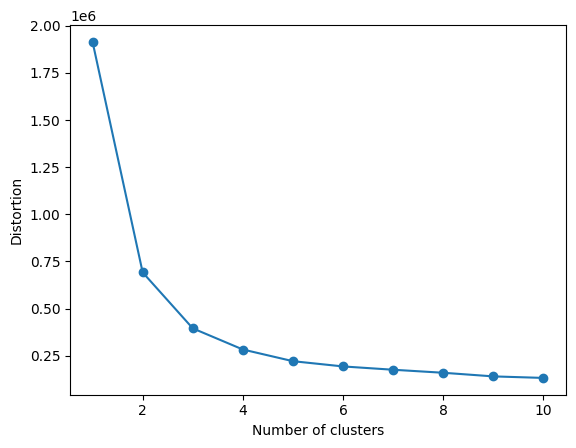

In [33]:
import matplotlib.pyplot as plt
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(data)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()
